In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import timeit

In [3]:
import os
os.getcwd()
os.chdir("/home/aumaron/Desktop/other_projects/")

In [4]:
# Data
customer_transaction = pd.read_csv("datasets/train.csv")

In [5]:
target = np.array(customer_transaction["target"])
train_array = np.array(customer_transaction.iloc[:, 2:])

In [6]:
np.unique(target, return_counts=True)

(array([0, 1]), array([179902,  20098]))

# Classification

## 1. Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### A. Trained on the entire dataset

In [7]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(train_array, target)
y_pred = clf.predict(train_array)

print("accuracy: {}".format(metrics.accuracy_score(target, y_pred)))

accuracy: 0.91197


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### A.1.1 Confusion Matrix

In [8]:
print(metrics.classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    179902
           1       0.68      0.23      0.35     20098

    accuracy                           0.91    200000
   macro avg       0.80      0.61      0.65    200000
weighted avg       0.90      0.91      0.89    200000



### A.1.2 Metrics

In [9]:
precision = metrics.precision_score(target, y_pred)
recall = metrics.recall_score(target, y_pred)
accuracy = metrics.accuracy_score(target, y_pred)

print("precision: {:g}".format(precision))
print("recall: {:g}".format(recall))

print("\n---------------------\n")

print("accuracy: {}".format(accuracy))

print("\n---------------------\n")

f1_score = 2*precision*recall/(precision + recall)
print("f1_score: {}".format(f1_score))

precision: 0.680006
recall: 0.234202

---------------------

accuracy: 0.91197

---------------------

f1_score: 0.34840858623242044


### B. Trained on split data (Train and Test)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_array, target, test_size=0.25, random_state=0)

In [91]:
clf = LogisticRegression(penalty="elasticnet", 
                             solver="saga",
                             l1_ratio=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy: 0.91206


/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### B.1.1 Confusion Matrix

In [95]:
print(clf.predict_proba(X_test))
print(y_pred[:5])

[[0.9735484  0.0264516 ]
 [0.99874274 0.00125726]
 [0.28411281 0.71588719]
 ...
 [0.9806469  0.0193531 ]
 [0.94722892 0.05277108]
 [0.91978266 0.08021734]]
[0 0 1 0 0]


In [98]:
metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

array([[44291,   611],
       [ 3786,  1312]])



|                     | Positive Observation     | Negative Observation    |
|---------------------|:------------------------:|:-----------------------:|
| Positive Prediction |     True Positive (TP)   | False Positive (FP)     |
| Negative Prediction | False Negative (FN)      |     True Negative (TN)  |

Given the definitions used earlier, the equation for precision and recall are

$$ \text{precision} = \frac{\text{TP}}{TP + FP}$$
and
$$ \text{recall} = \frac{\text{TP}}{TP + FN}. $$


In [100]:
3786/ (3786 + 611)

0.8610416192858767

In [73]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44902
           1       0.68      0.26      0.37      5098

    accuracy                           0.91     50000
   macro avg       0.80      0.62      0.66     50000
weighted avg       0.90      0.91      0.89     50000



### B.1.2 Metrics

In [74]:
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("precision: {:g}".format(precision))
print("recall: {:g}".format(recall))

print("\n---------------------\n")

print("accuracy: {}".format(accuracy))

print("\n---------------------\n")

f1_score = 2*precision*recall/(precision + recall)
print("f1_score: {}".format(f1_score))

precision: 0.682267
recall: 0.257356

---------------------

accuracy: 0.91206

---------------------

f1_score: 0.3737359350519868


In [75]:
lr_probs

array([0.01795155, 0.0030013 , 0.50746524, ..., 0.01643844, 0.04093186,
       0.06301876])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.851


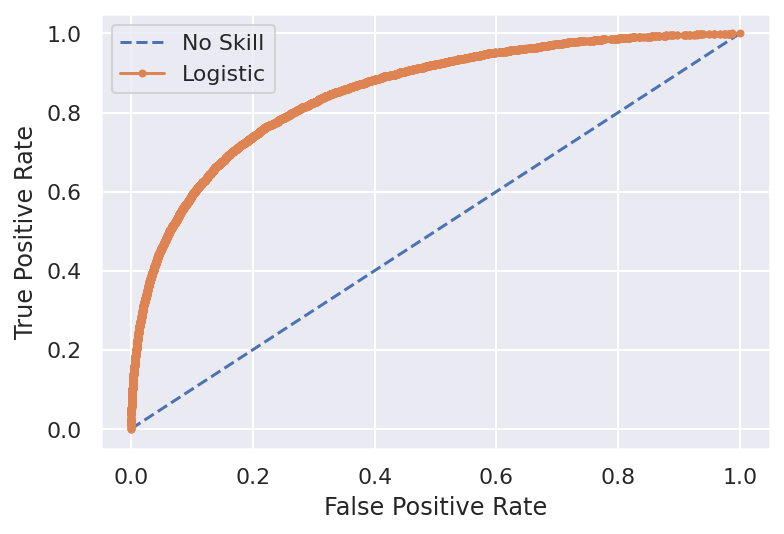

In [76]:
lr_probs = clf.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.374 auc=0.492


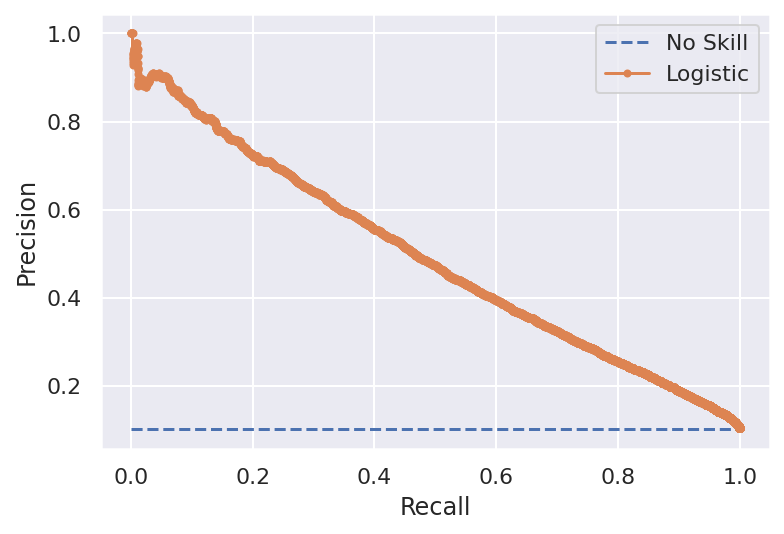

In [77]:
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = y_pred
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = metrics.f1_score(y_test, yhat), metrics.auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


### C. KFold Cross Validation

In [9]:
# %%timeit -n 1
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

scores = []
coeffs = []
lr_auc = 0
lr_fpr = 0
lr_tpr = 0
cm_ = np.zeros((2,2))
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)  # n_splits = 10
for train, test in kf.split(train_array, target):
    X_train, X_test = train_array[train], train_array[test]
    y_train, y_test = target[train], target[test]
    
    clf = LogisticRegression(solver="lbfgs")
    clf.fit(X_train, y_train)
    coeff = clf.coef_
    coeffs.append(coeff)
    y_pred = clf.predict(X_test)
    lr_probs = clf.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_auc = lr_auc + metrics.roc_auc_score(y_test, lr_probs)
    cm_ = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
    lr_fpr = metrics.roc_curve(y_test, lr_probs)[0]
    lr_tpr = metrics.roc_curve(y_test, lr_probs)[1]
###########
mean_roc = lr_auc/ 5
mean_lr_fpr = lr_fpr/ 5
mean_lr_tpr = lr_tpr/ 5
# print(f"Confusion matrix - \n{cm_}")
# plot the roc curve for the model
# plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# plt.plot(mean_lr_fpr, mean_lr_tpr, marker='.', label='Logistic')
# axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# show the legend
# plt.legend()
# show the plot
# plt.show()

#     scores.append(metrics.accuracy_score(y_test, y_pred))
#     print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
# avg_score = sum(scores)/ len(scores)
# print("average score: {}".format(avg_score))
# pred_test_full = 0
# cv_score =[]
# i=1
# for train_index,test_index in kf.split(X,y):
#     print('{} of KFold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
#     lr = LogisticRegression(C=2)
#     lr.fit(xtr,ytr)
#     score = roc_auc_score(yvl,lr.predict(xvl))
#     print('ROC AUC score:',score)
#     cv_score.append(score)
#     pred_test = lr.predict_proba(x_test)[:,1]
#     pred_test_full +=pred_test
#     i+=1

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

In [10]:
print(coeffs)

[array([[ 5.74163807e-02,  4.09480355e-02,  6.92691822e-02,
         1.36788979e-02,  1.99386051e-02,  1.32469992e-02,
         3.32815845e-01, -1.12617950e-03,  1.74898729e-02,
        -1.52621991e-01, -1.48321539e-03,  1.25960910e-02,
        -4.59691665e-02, -4.18927731e-02, -6.25058307e-03,
         1.29077688e-01,  9.72527474e-03, -3.20946803e-04,
         1.74769833e-02,  4.61969603e-03, -1.04167256e-02,
        -2.36174216e-02,  7.47745771e-02, -9.86670899e-02,
         2.51447087e-02,  1.01915566e-01,  3.40466623e-02,
        -5.63446244e-03, -1.02939207e-01,  1.02406862e-02,
         4.10588823e-05, -3.18994485e-02,  4.04303082e-02,
        -3.61584187e-02, -1.79759859e-01,  2.33267778e-02,
        -4.25383346e-02,  8.18725890e-03,  2.20250437e-03,
        -3.47228267e-03,  1.94042665e-02, -5.99349403e-04,
         2.77446804e-04, -2.48730521e-02, -2.78815174e-02,
        -3.00638406e-03,  1.18338371e-02,  3.23167662e-03,
         8.97538385e-03,  1.26534188e-02, -2.87739038e-

In [106]:
192386+7614

200000

### C.1.1 Confusion Matrix

In [86]:
metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[ 1078,  2942],
       [  503, 35477]])



|                     | Positive Observation     | Negative Observation    |
|---------------------|:------------------------:|:-----------------------:|
| Positive Prediction |     True Positive (TP)   | False Positive (FP)     |
| Negative Prediction | False Negative (FN)      |     True Negative (TN)  |

Given the definitions used earlier, the equation for precision and recall are

$$ \text{precision} = \frac{\text{TP}}{TP + FP}$$
and
$$ \text{recall} = \frac{\text{TP}}{TP + FN}. $$


In [80]:
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("precision: {:g}".format(precision))
print("recall: {:g}".format(recall))

print("\n---------------------\n")

print("accuracy: {}".format(accuracy))

print("\n---------------------\n")

f1_score = 2*precision*recall/(precision + recall)
print("f1_score: {}".format(f1_score))

precision: 0.681847
recall: 0.268159

---------------------

accuracy: 0.913875

---------------------

f1_score: 0.38493126227459384


### 1.2.2 Area under the curve

In [130]:
lr_fpr + 0

array([0.        , 0.        , 0.        , ..., 0.98268482, 0.98268482,
       1.        ])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.857


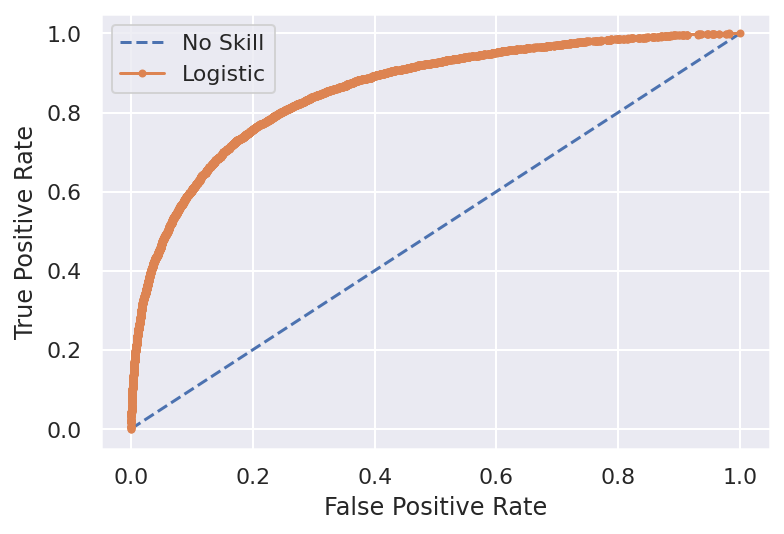

In [107]:
lr_probs = clf.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.385 auc=0.502


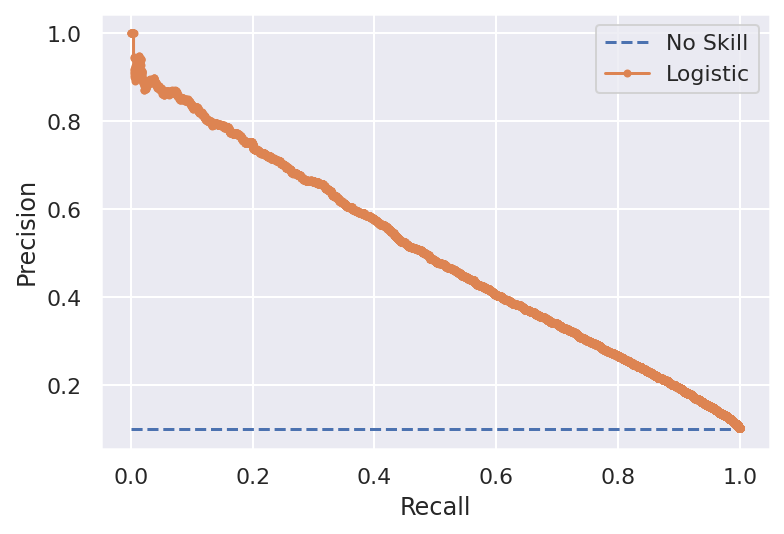

In [89]:

# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = y_pred
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = metrics.f1_score(y_test, yhat), metrics.auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
